# Linear Discriminant Analysis (LDA)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap


## Importing the Dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the Dataset into the Training Set and Test Set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying LDA

### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a technique used for dimensionality reduction and classification. 

It is used to find a linear combination of features that best separate two or more classes.

LDA works by maximizing the ratio of between-class variance to the within-class variance to ensure maximum separability.

#### Steps:
1. **Compute the Mean Vectors**: Compute the mean vector for each class and the overall mean vector.

2. **Compute the Scatter Matrices**:
   - **Within-Class Scatter Matrix**:
   $$ S_W = \sum_{i=1}^{c} \sum_{x_k \in C_i} (x_k - \mu_i)(x_k - \mu_i)^T $$
   Where $c$ is the number of classes, $C_i$ is the set of samples in class $i$, and $\mu_i$ is the mean vector of class $i$.
   - **Between-Class Scatter Matrix**:
   $$ S_B = \sum_{i=1}^{c} N_i (\mu_i - \mu)(\mu_i - \mu)^T $$
   Where $N_i$ is the number of samples in class $i$ and $\mu$ is the overall mean vector.

3. **Compute the Eigenvalues and Eigenvectors**: Solve the generalized eigenvalue problem for the matrix $S_W^{-1} S_B$ to find the eigenvalues and eigenvectors.

4. **Sort and Select Linear Discriminants**: Order the eigenvectors by their corresponding eigenvalues in descending order. Select the top $k$ eigenvectors to form a transformation matrix $W$.

5. **Transform the Data**: Project the data onto the new feature space.
$$ Z = X \cdot W $$
   Where $Z$ is the transformed data, $X$ is the original data, and $W$ is the matrix of selected eigenvectors.

LDA effectively reduces the number of features while ensuring maximum class separability.

In [5]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Training the Logistic Regression Model on the Training Set

In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [10]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [11]:
accuracy_score(y_test, y_pred)

1.0

## Visualising the Training Set Results

/tmp/ipykernel_37187/1584971462.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


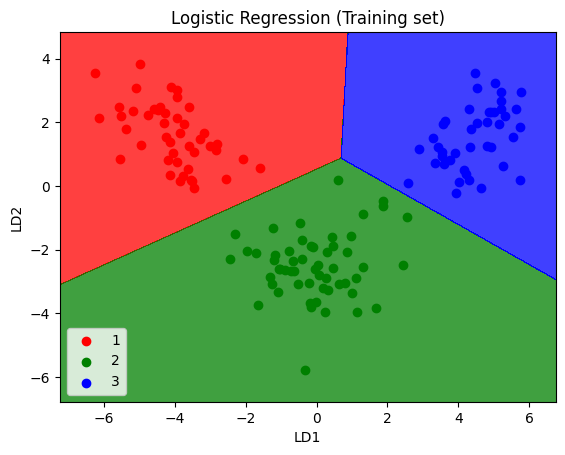

In [8]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test Set Results

/tmp/ipykernel_37187/3504698074.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


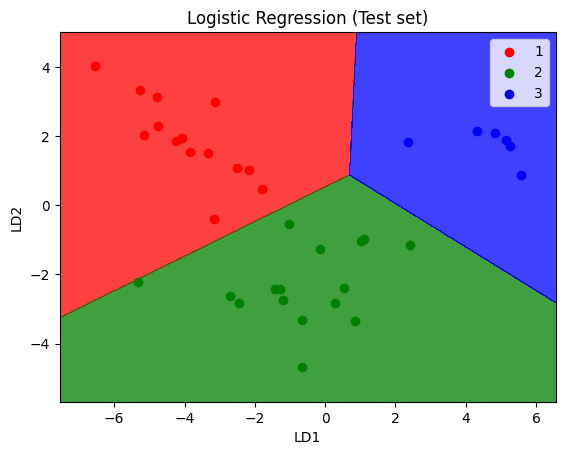

In [9]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()